# **Prediccion en credito hipotecario**

Dream Housing Finance se ocupa de todos los préstamos hipotecarios. Tienen presencia en todas las áreas urbanas, semiurbanas y rurales. El cliente primero solicita un préstamo hipotecario después de que la compañía valida la elegibilidad del cliente para un préstamo.

**Problema comercial:** La empresa desea automatizar el proceso de elegibilidad del préstamo (en tiempo real) en función de los detalles del cliente proporcionados al completar el formulario de solicitud en línea. Estos detalles son Género, Estado Civil, Educación, Número de Dependientes, Ingresos, Monto del Préstamo, Historial de Crédito y otros. Para automatizar este proceso, han dado un problema para identificar los segmentos de clientes elegibles para los montos de los préstamos para apuntar específicamente a estos clientes. Aquí han proporcionado un conjunto de datos parcial.

**Problema analitico:** en base al dataset de plantea una necesidad de elegibilidad automatica. En base a esto se debe realizar un analisis de los datos, seleccion de modelos predictivos y posterior incorporacion en un software de automatizacion.

**Hipotesis:** mediante el análisis de los datos proporcionados por Dream Housing Finance, es posible construir un modelo predictivo que automatice el proceso de elegibilidad de préstamos hipotecarios en tiempo real. Este modelo utilizará variables como género, estado civil, educación, número de dependientes, ingresos, historial de crédito, entre otros, para identificar los segmentos de clientes elegibles para los montos de préstamos y permitir que la compañía apunte específicamente a estos clientes. Además, se espera que este modelo ayude a mejorar la eficiencia del proceso de préstamo hipotecario y reducir el riesgo de impago de préstamos. Finalmente, se espera que este modelo se incorpore en un software de automatización para permitir una implementación más rápida y eficiente.

Kaggle: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

# **Instalacion, librerias, dataset**

In [2]:
%pip install --upgrade pip -q
%pip install seaborn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install sidetable -q
%pip install xgboost -q
%pip install lazypredict -q
%pip install imblearn -q
%pip install missingno -q
%pip install statsmodels -q
%pip install -U scikit-learn -q
%pip install mlxtend -q
%pip install --upgrade scikit-learn -q
%pip install requests -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings;
from pandas.api.types import is_numeric_dtype
import numpy as np
from matplotlib.patches import Rectangle
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [4]:
hipoteca1= data = pd.read_csv('C:\\Users\\rodri\\OneDrive\\Datos adjuntos\\Documentos\\Proyectos personales - DATA\\Datasets\\loan_sanction_train.csv')
pd.options.display.max_columns = None
hipoteca1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [5]:
hipoteca2= data = pd.read_csv('C:\\Users\\rodri\\OneDrive\\Datos adjuntos\\Documentos\\Proyectos personales - DATA\\Datasets\\loan_sanction_test.csv')
pd.options.display.max_columns = None
hipoteca2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


# Insights generales **Preparacion de datos para visualizar**

In [6]:
df1=pd.DataFrame(hipoteca1)
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [7]:
def univariado_info(df1):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''


  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  for col in df1:

      data_series = df1[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df1.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df1.skew(), df1.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df1)
df_uni_stats

,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Loan_ID,614,object,0,614,False,LP001002,-,-,-,-,-,-,-,-,-
Gender,601,object,13,2,False,Male,-,-,-,-,-,-,-,-,-
Married,611,object,3,2,False,Yes,-,-,-,-,-,-,-,-,-
Dependents,599,object,15,4,False,0,-,-,-,-,-,-,-,-,-
Education,614,object,0,2,False,Graduate,-,-,-,-,-,-,-,-,-
Self_Employed,582,object,32,2,False,No,-,-,-,-,-,-,-,-,-
ApplicantIncome,614,int64,0,505,True,-,5403.46,6109.04,150.00,2877.50,3812.50,5795.00,81000.00,6.54,60.54
CoapplicantIncome,614,float64,0,287,True,-,1621.25,2926.25,0.00,0.00,1188.50,2297.25,41667.00,7.49,84.96
LoanAmount,592,float64,22,203,True,-,146.41,85.59,9.00,100.00,128.00,168.00,700.00,2.68,10.40
Loan_Amount_Term,600,float64,14,10,True,-,342.00,65.12,12.00,360.00,360.00,360.00,480.00,-2.36,6.67


In [8]:
df1.shape

(614, 13)

Antes y despues de dropear nulos

In [9]:
df1=df1.dropna()
df1.shape

(480, 13)

Obtenemos los datos en numericos, para poder trabajar en predicciones de manera mas comoda.

In [11]:
df1['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df1['Gender'] = df1['Gender'].astype(int)

df1['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
df1['Married'] = df1['Married'].astype(int)

df1['Dependents'].replace({'3+': 3}, inplace=True)
df1['Dependents'] = df1['Dependents'].astype(int)

df1['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace=True)
df1['Education'] = df1['Education'].astype(int)

df1['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)
df1['Self_Employed'] = df1['Self_Employed'].astype(int)

df1['Credit_History'] = df1['Credit_History'].astype(int)

df1['Property_Area'].replace({'Urban': 0, 'Semiurban': 1,'Rural':2}, inplace=True)
df1['Property_Area'] = df1['Property_Area'].astype(int)

df1['Loan_Status'].replace({'Y': 1, 'N': 0}, inplace=True)
df1['Loan_Status'] = df1['Loan_Status'].astype(int)

df1.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.00,128.00,360.00,1,2,0


In [12]:
def univariado_info(df1):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #create a dataframe with especificas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df1:

      #obtengo info de la columna
      data_series = df1[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df1.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df1.skew(), df1.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df1)
df_uni_stats

,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Loan_ID,480,object,0,480,False,LP001003,-,-,-,-,-,-,-,-,-
Gender,480,int32,0,2,True,-,0.18,0.38,0.00,0.00,0.00,0.00,1.00,1.68,0.82
Married,480,int32,0,2,True,-,0.65,0.48,0.00,0.00,1.00,1.00,1.00,-0.62,-1.62
Dependents,480,int32,0,4,True,-,0.78,1.02,0.00,0.00,0.00,2.00,3.00,0.94,-0.50
Education,480,int32,0,2,True,-,0.80,0.40,0.00,1.00,1.00,1.00,1.00,-1.49,0.22
Self_Employed,480,int32,0,2,True,-,0.14,0.34,0.00,0.00,0.00,0.00,1.00,2.11,2.47
ApplicantIncome,480,int64,0,405,True,-,5364.23,5668.25,150.00,2898.75,3859.00,5852.50,81000.00,6.92,74.06
CoapplicantIncome,480,float64,0,232,True,-,1581.09,2617.69,0.00,0.00,1084.50,2253.25,33837.00,5.88,57.66
LoanAmount,480,float64,0,186,True,-,144.74,80.51,9.00,100.00,128.00,170.00,600.00,2.36,8.50
Loan_Amount_Term,480,float64,0,9,True,-,342.05,65.21,36.00,360.00,360.00,360.00,480.00,-2.33,6.36


- El dataframe contiene 480 datos en 13 columnas
- El target es Loan_Status

La variable "Género" tiene una media de 0,18 y una desviación estándar de 0,38. Esto sugiere que la mayoría de las observaciones (alrededor del 82%) son probablemente de hombres, con una pequeña proporción de observaciones de mujeres.

La variable "Casados" tiene una media de 0,65, lo que indica que la mayoría de las observaciones son casados.

"Dependientes" tiene una media de 0,78, con una desviación estándar de 1,02. Esto sugiere que la mayoría de las observaciones tienen algunos dependientes, con un rango de 0 a 3 dependientes.

La variable “Educación” tiene una media de 0,80, lo que indica que la mayoría de las observaciones han realizado un posgrado.

La variable "Autoempleado" tiene una media de 0,14, lo que sugiere que la mayoría de las observaciones no son autónomos.

La variable "SolicitanteIngreso" tiene una media de 5364,23 y una desviación estándar de 5668,25. Esto sugiere una amplia gama de valores de ingresos entre las observaciones, con un mínimo de 150 y un máximo de 81000.

La variable "CoapplicantIncome" tiene una media de 1581,09 y una desviación estándar de 2617,69. Esto sugiere que la mayoría de las observaciones tienen algún ingreso de cosolicitante, con un rango de 0 a 33837.

La variable "LoanAmount" tiene una media de 144,74 y una desviación estándar de 80,51. Esto sugiere una amplia gama de montos de préstamo entre las observaciones, con un mínimo de 9 y un máximo de 600.

La variable "Loan_Amount_Term" tiene una media de 342,05 y una desviación estándar de 65,21. Esto sugiere que la mayoría de los préstamos tienen un plazo de 360 ​​meses, con un rango de 36 a 480 meses.

La variable “Credit_History” tiene una media de 0,85, lo que indica que la mayoría de las observaciones tienen un historial crediticio positivo.

La variable "Property_Area" tiene una media de 0,98 y una desviación estándar de 0,78. Esto sugiere que la mayoría de las propiedades se encuentran en una zona urbana, con un rango de 0 a 2 para zonas rurales, semiurbanas y urbanas.

La variable "Loan_Status" tiene una media de 0,31, lo que sugiere que alrededor del 31% de los préstamos han sido aprobados.

# EDA **Creditos aprobados y denegados, diferencias**

In [17]:
total_c = df1['Loan_Status'].value_counts()
percentage = (df1['Loan_Status'].value_counts() / len(df1)) * 100
amount = pd.Series(df1.groupby("Loan_Status")["LoanAmount"].sum(), name='amount')

result = pd.concat([total_c, percentage, amount], axis=1, keys=['total', 'percentage', 'amount'])

total_row = pd.Series([result['total'].sum(), 100, df1['LoanAmount'].sum()], 
                      name='Total', 
                      index=['total', 'percentage', 'amount'])

result.loc['Total'] = total_row

result = result.round({'percentage': 4, 'amount': 2})
result = result.rename(index={0: 'Credito Aprobado', 1: 'Credito denegado', 'Total': 'Total'})
result

,total,percentage,amount
Credito denegado,332.00,69.17,46773.00
Credito Aprobado,148.00,30.83,22700.00
Total,480.00,100.00,69473.00


Correlacion para seleccionar las principales variables a analizar segun el estado del prestamo

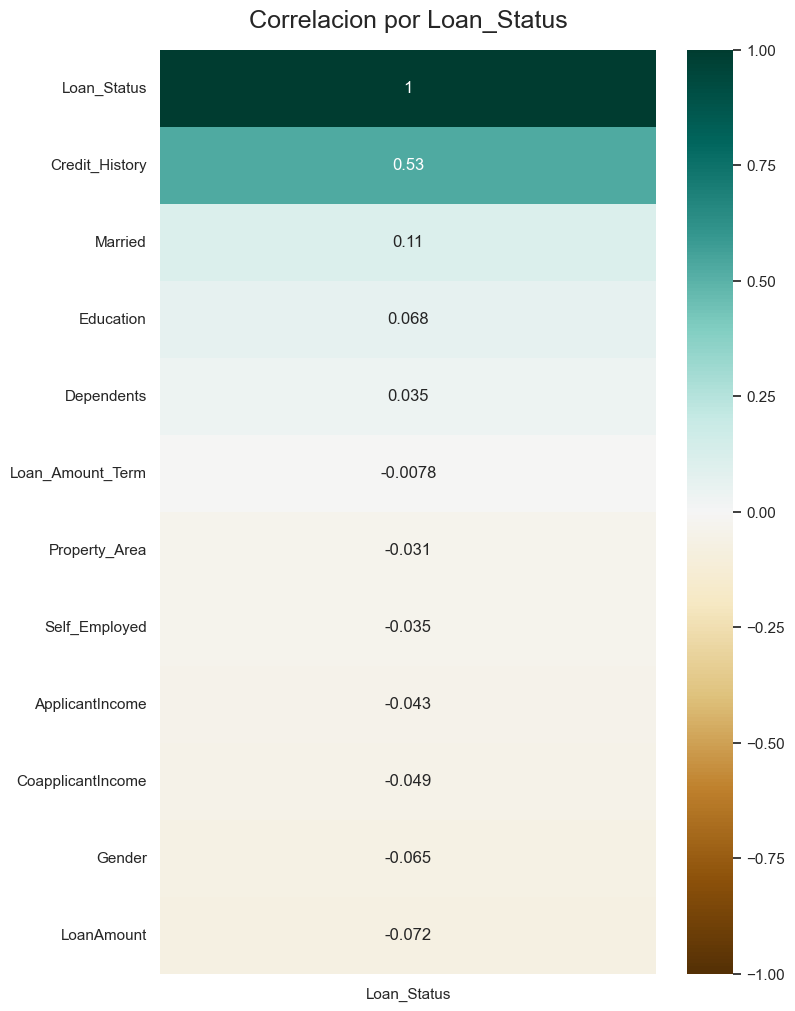

In [350]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['Loan_Status']].sort_values(by='Loan_Status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlacion por Loan_Status', fontdict={'fontsize':18}, pad=16);

In [351]:
#Para trabajar de manera mas organizada
df_Y = df1[df1['Loan_Status'] == 1]
df_N = df1[df1['Loan_Status'] == 0]

Dispersion entre las principales variables numericas

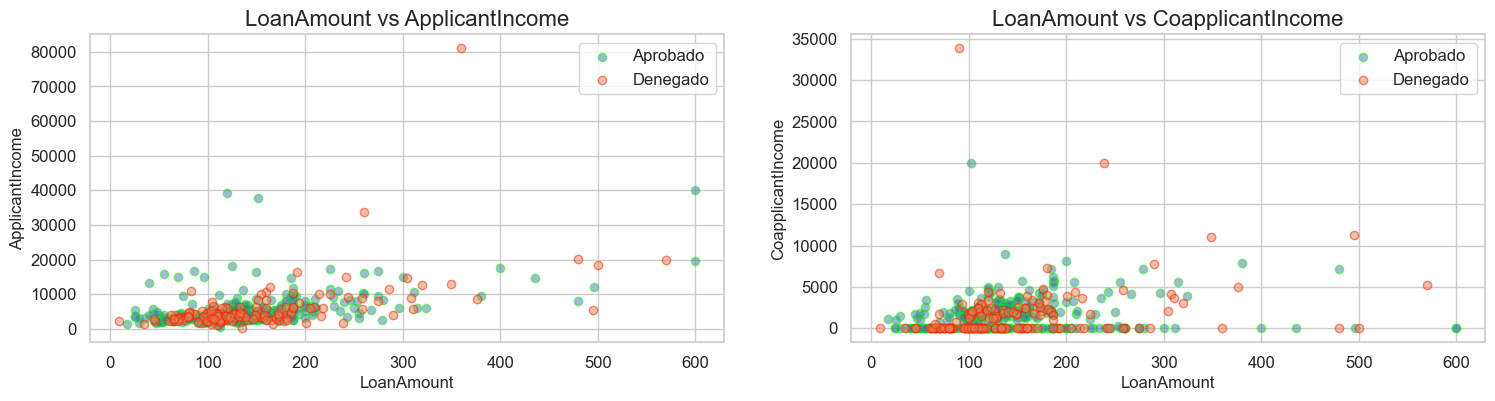

In [397]:
#LoanAmount vs ApplicantIncome
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_Y['LoanAmount'], df_Y['ApplicantIncome'], edgecolor='#04F801', alpha=0.5, label= 'Aprobado')
plt.scatter(df_N['LoanAmount'], df_N['ApplicantIncome'], edgecolor='#F81B01', alpha=0.5, label= 'Denegado')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('LoanAmount', fontsize=12)
plt.title('LoanAmount vs ApplicantIncome', fontsize=16);

#LoanAmount vs CoapplicantIncome
plt.subplot(122)
plt.scatter(df_Y['LoanAmount'], df_Y['CoapplicantIncome'], edgecolor='#04F801', alpha=0.5, label= 'Aprobado')
plt.scatter(df_N['LoanAmount'], df_N['CoapplicantIncome'], edgecolor='#F81B01', alpha=0.5, label= 'Denegado')
plt.legend(loc='best', fontsize=12)
plt.xlabel('LoanAmount', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('CoapplicantIncome', fontsize=12)
plt.yticks(fontsize=12)
plt.title('LoanAmount vs CoapplicantIncome', fontsize=16);

Distribucion en las variables binarias. Casado, Historial crediticion, Educacion   y su impacto con el LoanAmount en el Loan_Status

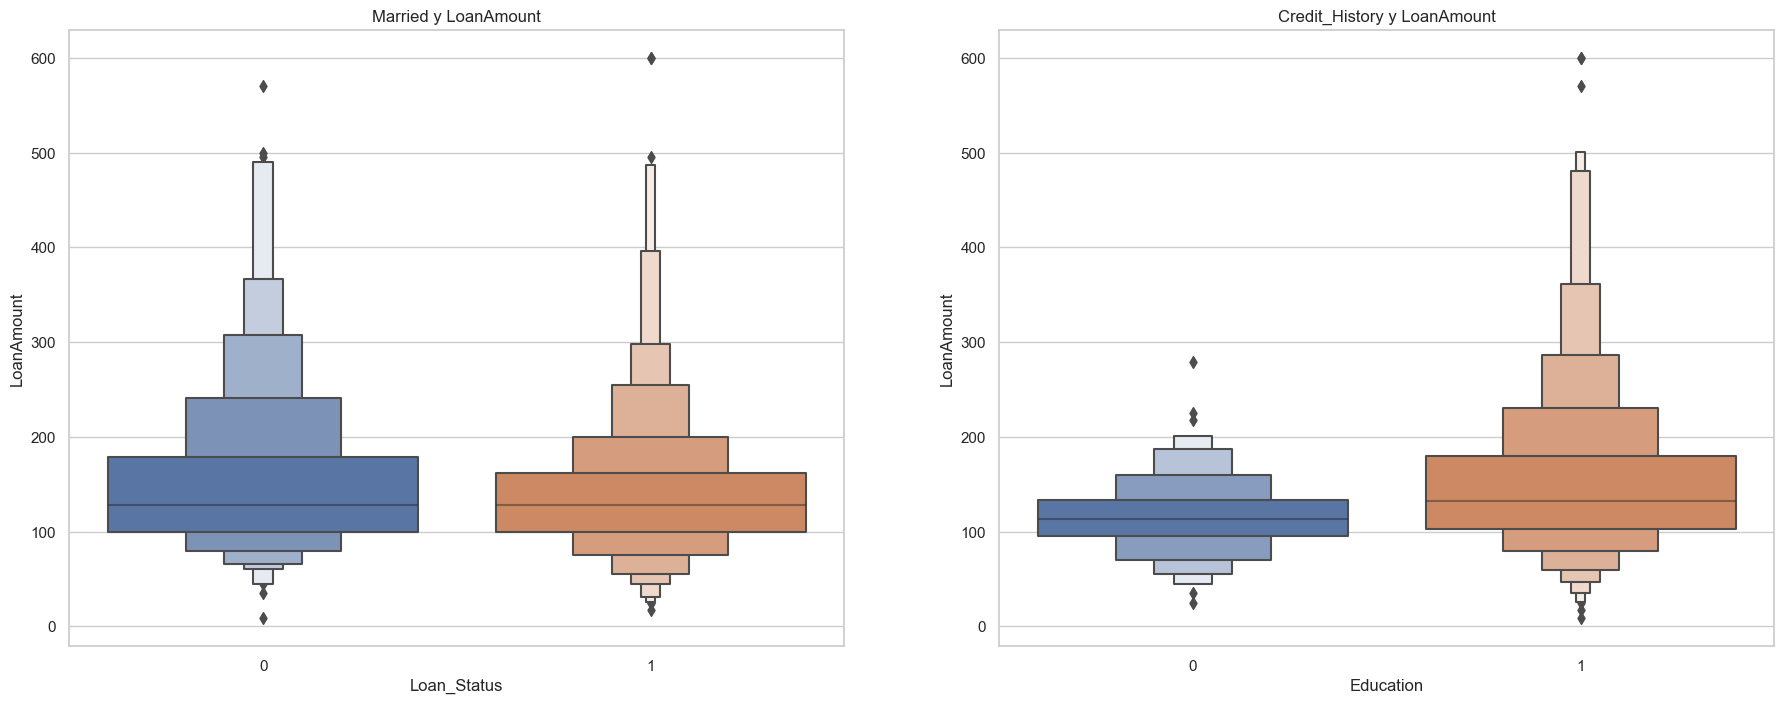

In [394]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))
sns.boxenplot(data=df1, x="Loan_Status", y="LoanAmount", k_depth="trustworthy",ax=axs[0])
axs[0].set_title('Married y LoanAmount')
sns.boxenplot(data=df1, x="Education", y="LoanAmount", k_depth="trustworthy",ax=axs[1])
axs[1].set_title('Credit_History y LoanAmount');

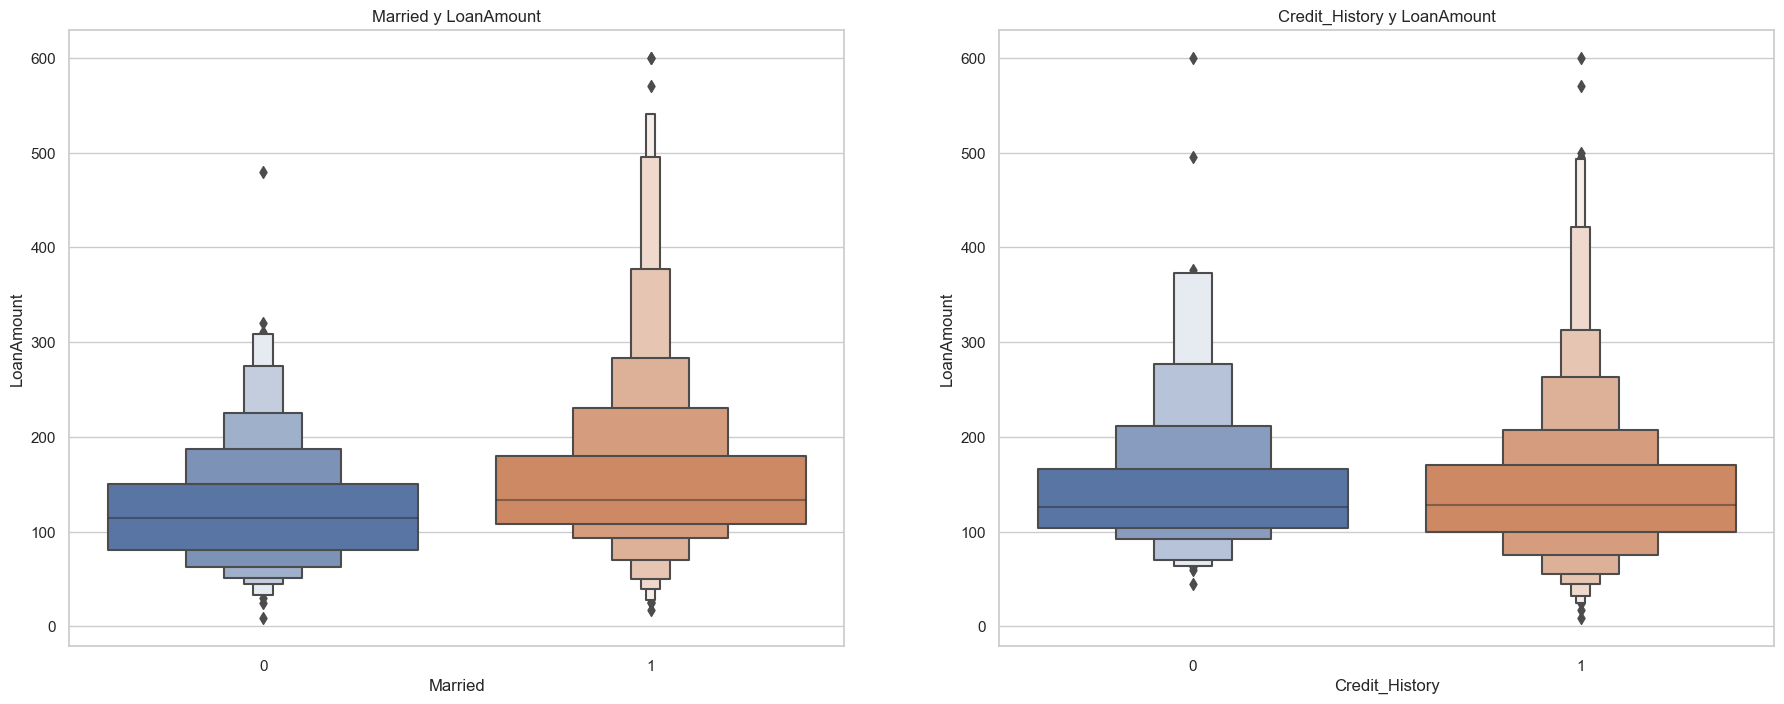

In [353]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))
sns.boxenplot(data=df1, x="Married", y="LoanAmount", k_depth="trustworthy",ax=axs[0])
axs[0].set_title('Married y LoanAmount')
sns.boxenplot(data=df1, x="Credit_History", y="LoanAmount", k_depth="trustworthy",ax=axs[1])
axs[1].set_title('Credit_History y LoanAmount');

In [396]:
fig = px.bar(data_frame=df1, x= "Loan_Status", y=['Credit_History', 'Married', 'Education'], barmode= "group")
fig.update_layout(xaxis_title="Loan_Status", yaxis_title="Cantidad ", title = 'Loan_Status   y caracteristicas')
fig.show()

# EDA **Monto del prestamo**

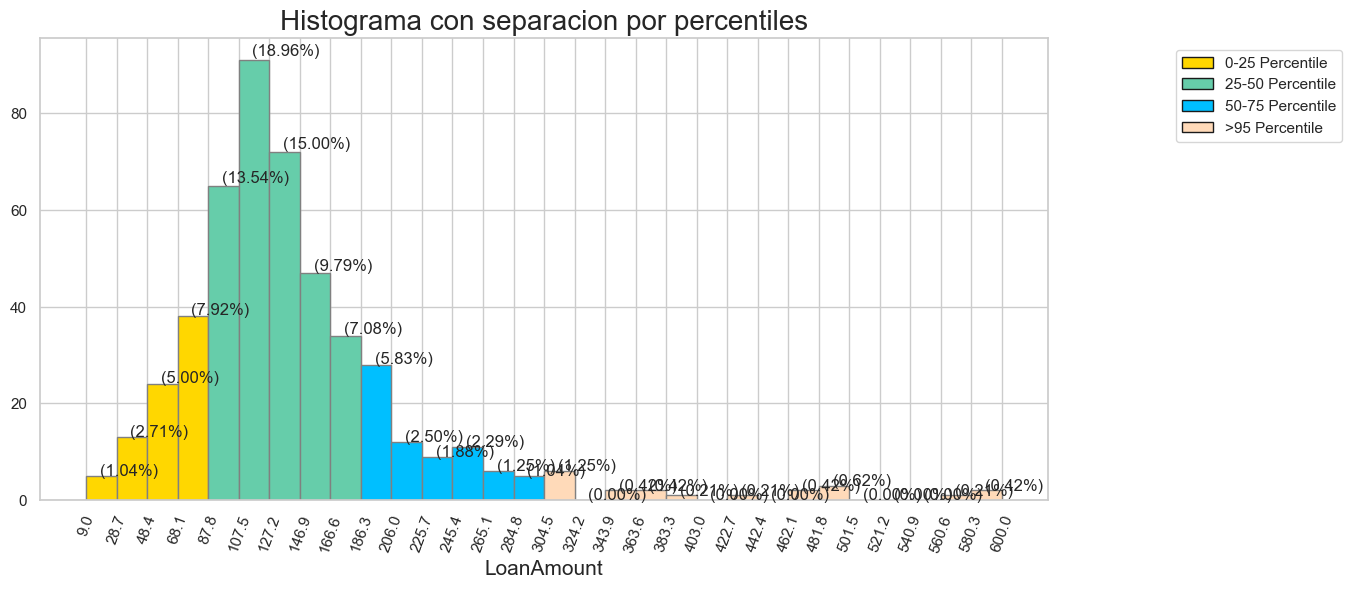

In [354]:
fig, ax = plt.subplots(figsize=(13,6))

data = df1['LoanAmount']

perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

counts, bins, patches = plt.hist(data, facecolor=perc_50_colour, edgecolor='gray', bins=30)

plt.xticks(bins.round(2))
plt.xticks(rotation=70)

plt.title('Histograma con separacion por percentiles', fontsize=20)
plt.xlabel('LoanAmount', fontsize=15)

q25, q75, q95 = np.percentile(data, [25, 75, 95])

for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

Cola derecha, posible outliers

# EDA **Outliers**

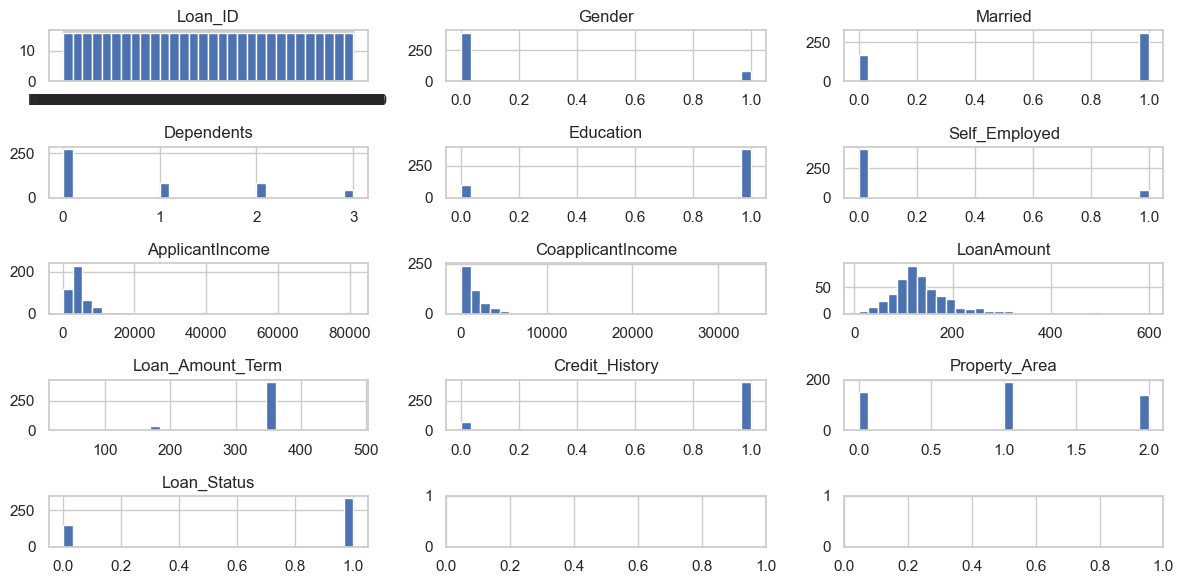

In [355]:
num_cols = len(df1.columns)

num_rows = num_cols // 3 + 1
num_cols = min(num_cols, 3)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))

axs = axs.flatten()

for i, col in enumerate(df1.columns):
    axs[i].hist(df1[col], bins=30)
    axs[i].set_title(col)

fig.tight_layout()
plt.show()

In [356]:
def detect_outliers(df1,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df1[col], 25)
      #75%
      Q3 = np.percentile(df1[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df1[(df1[col] < Q1 - outlier_step) | (df1[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df1,2,[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])
      #Drop outliers
df_out = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [357]:
total_c = df1['Loan_Status'].value_counts()
total_c1 = df_out['Loan_Status'].value_counts()
percentage = ((df1['Loan_Status'].value_counts() / len(df1['Loan_Status'])) * 100)
percentage_1 = ((df_out['Loan_Status'].value_counts() / len(df1['Loan_Status'])) * 100)
difff=percentage-percentage_1

result = pd.concat([total_c,percentage, total_c1, percentage_1, difff], axis=1, keys=['Con outliers','En porcentaje', 'Sin outliers', 'En porcentaje_1','Porcentaje eliminado'])

total_row = pd.Series([result['Con outliers'].sum(), result['En porcentaje'].sum(), result['Sin outliers'].sum(),result['En porcentaje_1'].sum(),result['Porcentaje eliminado'].sum()], 
                      name='Total', 
                      index=['Con outliers', 'En porcentaje', 'Sin outliers', 'En porcentaje_1','Porcentaje eliminado'])

result.loc['Total'] = total_row

result = result.round({'percentage': 4, 'Sin outliers': 4})
result = result.rename(index={0: 'Aprobado', 1: 'Denegado', 'Total': 'Total'})

result

,Con outliers,En porcentaje,Sin outliers,En porcentaje_1,Porcentaje eliminado
Denegado,332.00,69.17,319.00,66.46,2.71
Aprobado,148.00,30.83,126.00,26.25,4.58
Total,480.00,100.00,445.00,92.71,7.29


Antes y despues en el0 ingreso del aplicante y coaplicante

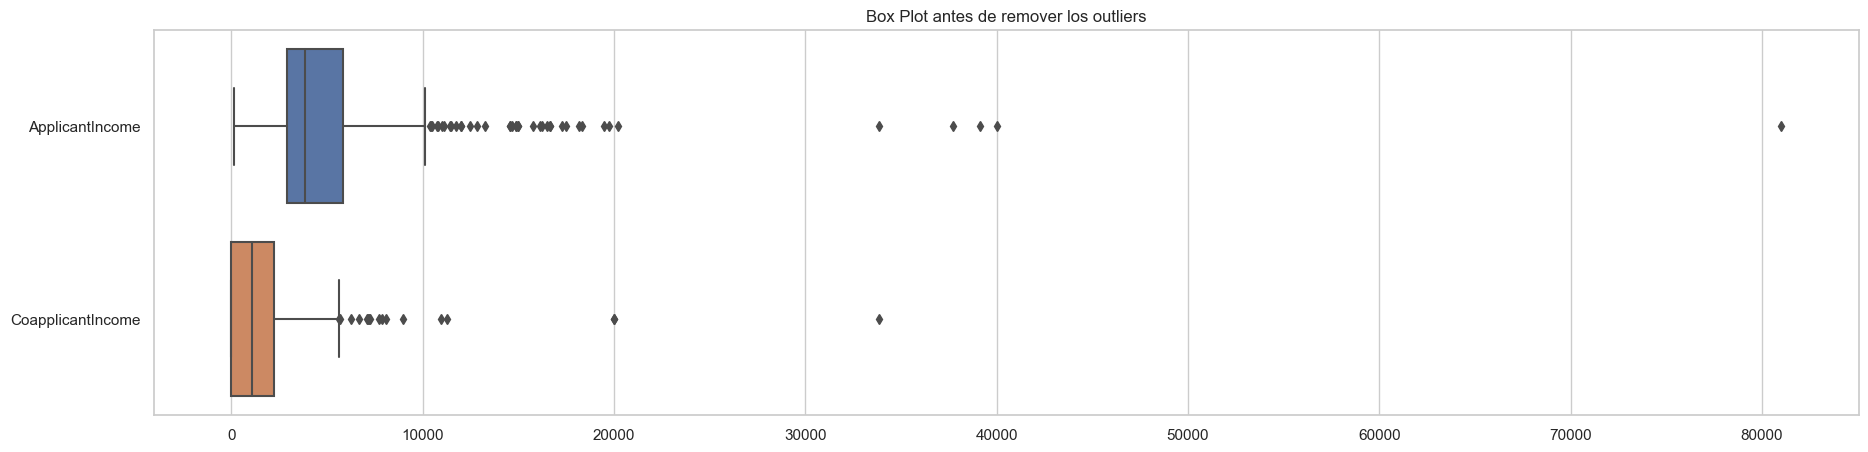

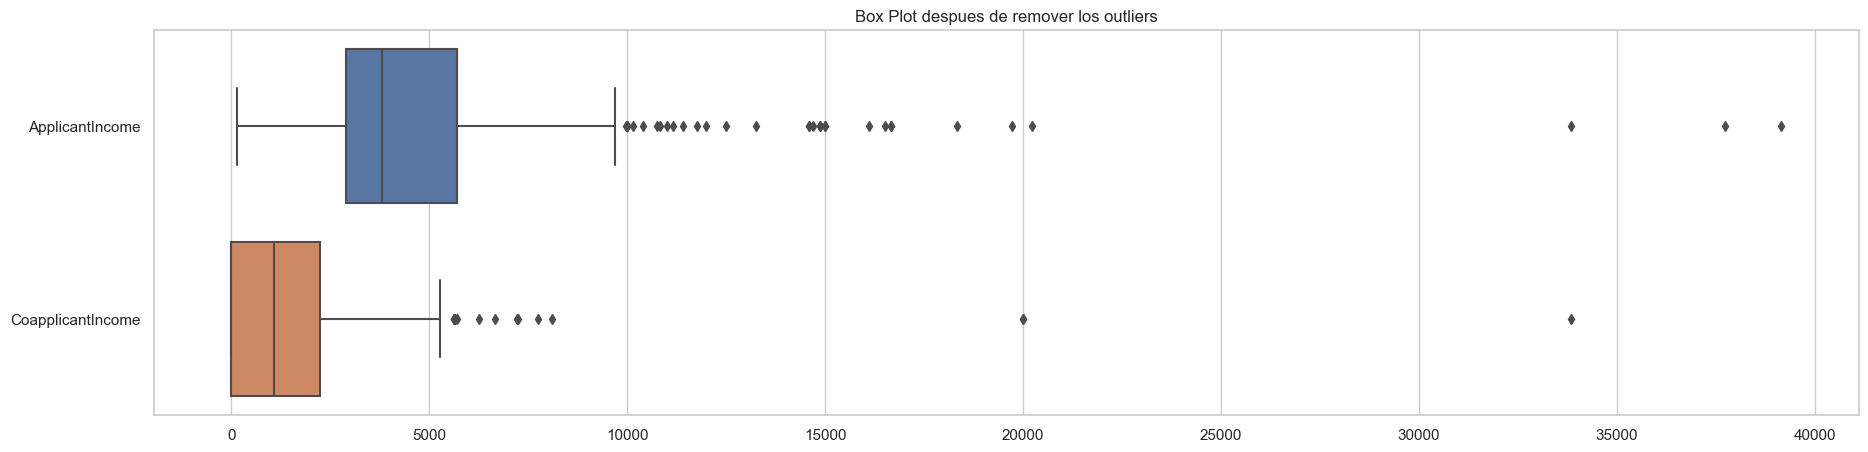

In [358]:
df_reviews = df1[['ApplicantIncome', 'CoapplicantIncome']]
df_reviews_out1 = df_out[['ApplicantIncome', 'CoapplicantIncome']]

plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews, orient="h")
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews_out1, orient="h")
plt.title("Box Plot despues de remover los outliers")
plt.show()

Antes y despues en Loan Amount

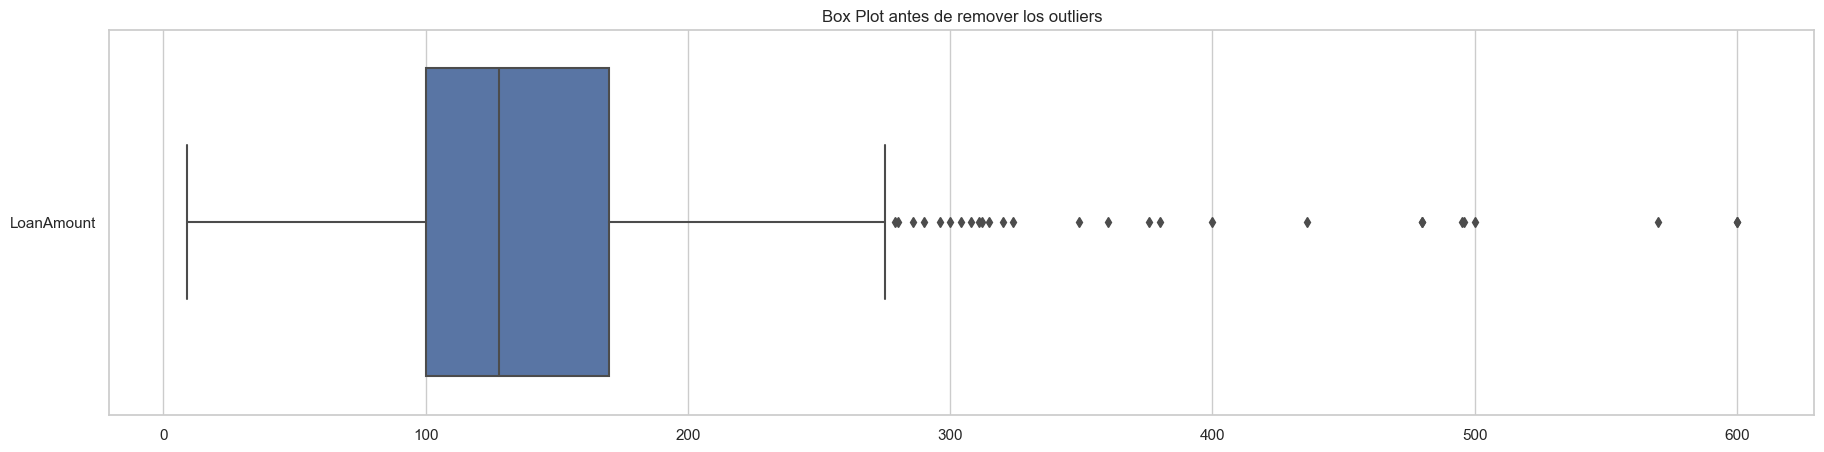

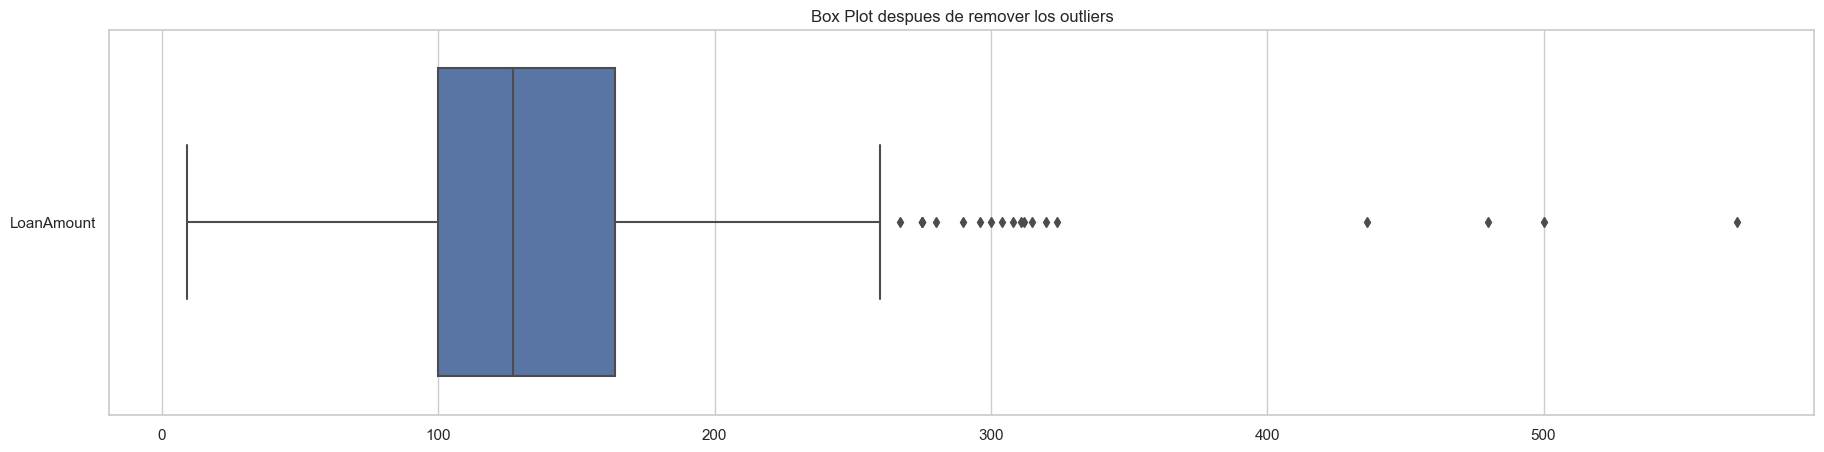

In [359]:
df_reviews1 = df1[['LoanAmount']]
df_reviews_out2 = df_out[['LoanAmount']]

plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews1, orient="h")
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews_out2, orient="h")
plt.title("Box Plot despues de remover los outliers")
plt.show()

Mejora minima en las distribuciones

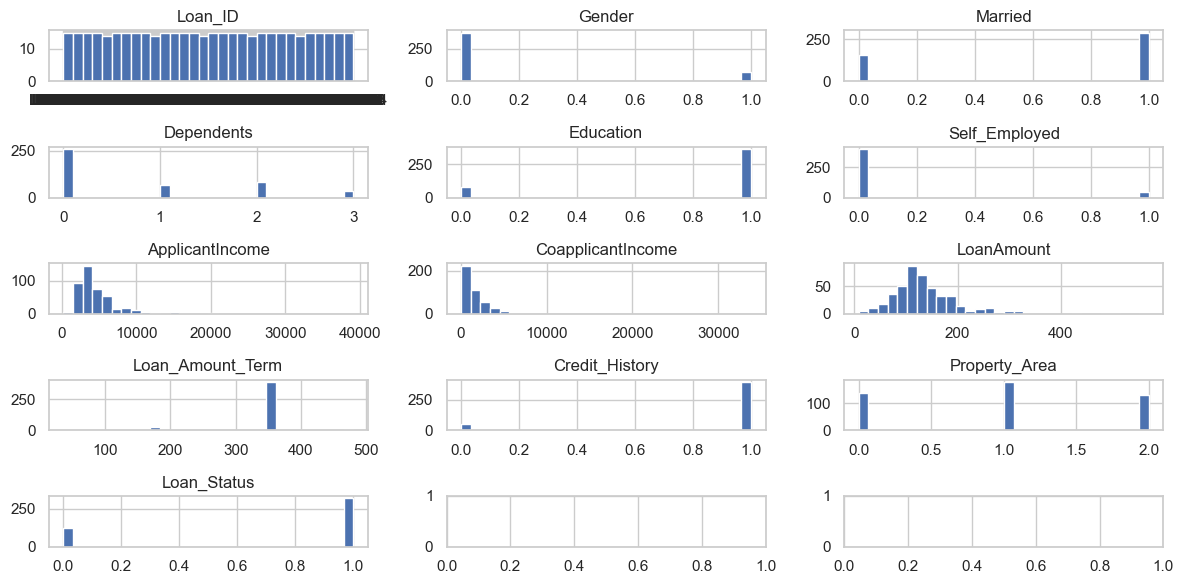

In [360]:
num_cols = len(df_out.columns)

num_rows = num_cols // 3 + 1
num_cols = min(num_cols, 3)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))

axs = axs.flatten()

for i, col in enumerate(df_out.columns):
    axs[i].hist(df_out[col], bins=30)
    axs[i].set_title(col)

fig.tight_layout()
plt.show()

Pequeña mejora en la distribucion de los datos. Se continua sin outliers.

# Pre seleccion de modelo - **Lazy pred**

In [361]:
X = df_out.drop(columns = ['Loan_Status','Loan_ID'])     # feature matrix
y = df_out['Loan_Status']                                # target feature
df_out.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.00,128.00,360.00,1,2,0


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
print(models[:10])

100%|██████████| 29/29 [00:01<00:00, 21.23it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.79               0.73     0.73      0.77   
DecisionTreeClassifier             0.76               0.72     0.72      0.76   
GaussianNB                         0.79               0.71     0.71      0.76   
LGBMClassifier                     0.79               0.70     0.70      0.76   
XGBClassifier                      0.78               0.70     0.70      0.75   
RandomForestClassifier             0.76               0.69     0.69      0.74   
SVC                                0.78               0.69     0.69      0.74   
KNeighborsClassifier               0.76               0.69     0.69      0.74   
AdaBoostClassifier                 0.75               0.68     0.68      0.73   
QuadraticDiscriminantAnalysis      0.75               0.68     0.68      0.73   

                           

[(0.0, 1.0)]

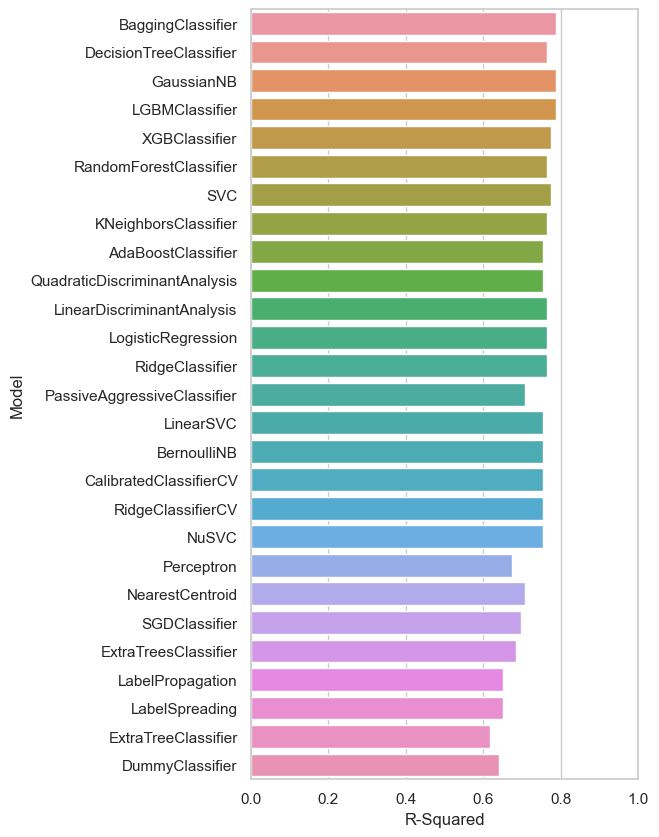

In [363]:
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

Se realizara un modelo prodictivo con XGBoost.

# Modelo y analisis - **XGBoost** - Primer prueba

In [364]:
df_out1=df_out[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History'	,'Property_Area'	,'Loan_Status']]
df_out1.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.00,128.00,360.00,1,2,0


In [365]:
agar_train, agar_test = train_test_split(df_out1, test_size=.33, random_state=1999)
agar_train_mat = xgb.DMatrix(agar_train.drop("Loan_Status", 1), label=agar_train["Loan_Status"])
agar_test_mat = xgb.DMatrix(agar_test.drop("Loan_Status", 1), label=agar_test["Loan_Status"])

print('Entrenamiento:' , agar_train.shape)
print('Test:' , agar_test.shape)

Entrenamiento: (298, 12)
Test: (147, 12)


In [366]:
parametros = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
rondas = 10
evaluacion = [(agar_test_mat, "eval"), (agar_train_mat, "train")]

modelo = xgb.train(parametros, agar_train_mat, rondas, evaluacion)
modelo

[0]	eval-logloss:0.60152	train-logloss:0.59487
[1]	eval-logloss:0.54883	train-logloss:0.54236
[2]	eval-logloss:0.52357	train-logloss:0.51131
[3]	eval-logloss:0.50979	train-logloss:0.49243
[4]	eval-logloss:0.49987	train-logloss:0.48051
[5]	eval-logloss:0.49014	train-logloss:0.47251
[6]	eval-logloss:0.49049	train-logloss:0.46696
[7]	eval-logloss:0.48497	train-logloss:0.45389
[8]	eval-logloss:0.48557	train-logloss:0.44903
[9]	eval-logloss:0.48766	train-logloss:0.43956


In [367]:
prediccion = modelo.predict(agar_test_mat)
prediccion = [1 if i > .5 else 0 for i in prediccion]
prediccion[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [368]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)
metricas = metricas(agar_test["Loan_Status"], prediccion)
[print(i) for i in metricas]

[[ 12  27]
 [  1 107]]
0.8095238095238095
              precision    recall  f1-score   support

           0       0.92      0.31      0.46        39
           1       0.80      0.99      0.88       108

    accuracy                           0.81       147
   macro avg       0.86      0.65      0.67       147
weighted avg       0.83      0.81      0.77       147



[None, None, None]

La matriz muestra que hubo 12 verdaderos negativos y 107 verdaderos positivos, 1 falsos negativos y 27 falso positivo.

La precisión es 80,95% que es la proporción de predicciones correctas (TP + TN) con respecto al número total de predicciones.

La precisión, recuperación, puntaje f1 y soporte se calculan utilizando las siguientes fórmulas:

- Precisión = TP / (TP + FP)
- Recall = TP / (TP + FN)
- Puntuación F1 = 2 * Precisión * Recuperación / (Precisión + Recuperación)
- Soporte = Número de observaciones para cada clase

La precisión para la clase 0 (no aprobada) es 0,92 y para la clase 1 (aprobada) es 0,80, lo que indica que el modelo es bueno para predecir casos deaprobados pero no tan bueno para predecir casos aprobados.

El recall para la clase 0 es 0,31 y para la clase 1 es 0,99, lo que indica que el modelo tiene una buena capacidad para identificar los verdaderos positivos pero una baja capacidad para identificar los verdaderos negativos.

La puntuación f1 es 0,46 para la clase 0 y 0,88 para la clase 1, lo que refleja el equilibrio entre precisión y recuperación.

# Modelo y analisis - **XGBoost** - Segunda prueba y definitiva

In [369]:
parametros_02 = {"booster":"gbtree", "max_depth": 6, "eta": .33, "objective": "binary:logistic", "nthread":2}
rondas_02 = 10000
modelo_02 = xgb.train(parametros_02, agar_test_mat, rondas_02, evaluacion, early_stopping_rounds=10)

[0]	eval-logloss:0.53717	train-logloss:0.59332
[1]	eval-logloss:0.43819	train-logloss:0.55301
[2]	eval-logloss:0.38363	train-logloss:0.52692
[3]	eval-logloss:0.33667	train-logloss:0.52116
[4]	eval-logloss:0.29528	train-logloss:0.52189
[5]	eval-logloss:0.26977	train-logloss:0.52469
[6]	eval-logloss:0.24440	train-logloss:0.53515
[7]	eval-logloss:0.22389	train-logloss:0.54531
[8]	eval-logloss:0.20808	train-logloss:0.55728
[9]	eval-logloss:0.19527	train-logloss:0.57225
[10]	eval-logloss:0.18610	train-logloss:0.58129
[11]	eval-logloss:0.17422	train-logloss:0.58975
[12]	eval-logloss:0.16605	train-logloss:0.59907


In [370]:
prediccion = modelo.predict(agar_test_mat)
prediccion = [1 if i > .5 else 0 for i in prediccion]
prediccion[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [371]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)
prediccion_02 = modelo_02.predict(agar_test_mat)
prediccion_02 = [1 if i > .5 else 0 for i in prediccion_02]
metricas_02 = metricas(agar_test["Loan_Status"], prediccion_02)
[print(i) for i in metricas_02]

[[ 36   3]
 [  1 107]]
0.9727891156462585
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.97      0.99      0.98       108

    accuracy                           0.97       147
   macro avg       0.97      0.96      0.96       147
weighted avg       0.97      0.97      0.97       147



[None, None, None]

La matriz muestra que hubo 107 verdaderos negativos y 36 verdaderos positivos, 3 falsos negativos y 1 falso positivo.

La precisión es de 97,27%, lo que indica que el modelo tiene una alta capacidad para hacer predicciones correctas.

La precisión para la clase 0 (no aprobada) es 0,97 y para la clase 1 (aprobada) es 0,97, lo que indica que el modelo es bueno para predecir casos positivos y negativos.

El recall para la clase 0 es 0,99 y para la clase 1 es 0,92, lo que indica que el modelo tiene una gran capacidad para identificar tanto los verdaderos negativos como los verdaderos positivos.

La puntuación f1 es 0,98 para la clase 0 y 0,95 para la clase 1, lo que refleja un buen equilibrio entre precisión y recuperación para ambas clases.

La exactitud, precisión, recuperación y puntaje f1 se informan como un promedio ponderado basado en el respaldo de cada clase, lo que indica el número de observaciones para cada clase.

En conclusión, esta matriz de confusión sugiere que el modelo tiene una alta precisión general y una buena capacidad para predecir casos positivos y negativos con alta precisión y recuperación, lo que lo convierte en un buen modelo para este problema de clasificación binaria.

In [372]:
modelo_02.save_model("modelo_02.model")

# **Prueba con dataset nuevo**

In [373]:
modelo_importado = xgb.Booster()
modelo_importado.load_model("modelo_02.model")

In [374]:
hipoteca2=pd.DataFrame(hipoteca2)
hipoteca2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


Paso datos a numerico

In [375]:
hipoteca2=hipoteca2.dropna()

hipoteca2['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)

hipoteca2['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
hipoteca2['Married'] = hipoteca2['Married'].astype(int)

hipoteca2['Dependents'].replace({'3+': 3}, inplace=True)
hipoteca2['Dependents'] = hipoteca2['Dependents'].astype(float)


hipoteca2['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace=True)
hipoteca2['Education'] = hipoteca2['Education'].astype(int)

hipoteca2['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)


hipoteca2['Property_Area'].replace({'Urban': 0, 'Semiurban': 1,'Rural':2}, inplace=True)
hipoteca2['Property_Area'] = hipoteca2['Property_Area'].astype(int)

hipoteca2=hipoteca2[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History'	,'Property_Area']]
hipoteca2.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.00,1,0,5720,0,110.00,360.00,1.00,0
1,0,1,1.00,1,0,3076,1500,126.00,360.00,1.00,0
2,0,1,2.00,1,0,5000,1800,208.00,360.00,1.00,0
4,0,0,0.00,0,0,3276,0,78.00,360.00,1.00,0
5,0,1,0.00,0,1,2165,3422,152.00,360.00,1.00,0


In [376]:
hipoteca2.info()
hipoteca2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             289 non-null    int64  
 1   Married            289 non-null    int32  
 2   Dependents         289 non-null    float64
 3   Education          289 non-null    int32  
 4   Self_Employed      289 non-null    int64  
 5   ApplicantIncome    289 non-null    int64  
 6   CoapplicantIncome  289 non-null    int64  
 7   LoanAmount         289 non-null    float64
 8   Loan_Amount_Term   289 non-null    float64
 9   Credit_History     289 non-null    float64
 10  Property_Area      289 non-null    int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 23.7 KB


(289, 11)

Uso el modelo para predecir en base a estos datos nuevos

In [377]:
test_matrix = hipoteca2.values
feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
test_dmatrix = xgb.DMatrix(data=test_matrix, feature_names=feature_names)
predictions = modelo_importado.predict(test_dmatrix)

In [378]:
predictions = [1 if i > .5 else 0 for i in predictions]

In [379]:
hipoteca2['Loan_Status_predict'] = predictions
hipoteca2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_predict
0,0,1,0.00,1,0,5720,0,110.00,360.00,1.00,0,1
1,0,1,1.00,1,0,3076,1500,126.00,360.00,1.00,0,1
2,0,1,2.00,1,0,5000,1800,208.00,360.00,1.00,0,1
4,0,0,0.00,0,0,3276,0,78.00,360.00,1.00,0,0
5,0,1,0.00,0,1,2165,3422,152.00,360.00,1.00,0,1


Funciona, ahora vuelvo los valores numericos a texto para visualizar mejor los resultados

In [380]:
modelofull=hipoteca2[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History'	,'Property_Area','Loan_Status_predict']]
modelofull['Gender'].replace({0: 'Male',  1: 'Female'}, inplace=True)

modelofull['Married'].replace({ 0:'No', 1:'Yes'}, inplace=True)

modelofull['Education'].replace({ 0:'Not Graduate',  1:'Graduate'}, inplace=True)

modelofull['Self_Employed'].replace({ 0:'No',  1:'Yes'}, inplace=True)

modelofull['Property_Area'].replace({ 0:'Urban',  1:'Semiurban',2:'Rural'}, inplace=True)

modelofull['Loan_Status_predict'].replace({ 0:'No aprobado',  1:'Aprobado'}, inplace=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
modelofull.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_predict
0,Male,Yes,0.00,Graduate,No,5720,0,110.00,360.00,1.00,Urban,Aprobado
1,Male,Yes,1.00,Graduate,No,3076,1500,126.00,360.00,1.00,Urban,Aprobado
2,Male,Yes,2.00,Graduate,No,5000,1800,208.00,360.00,1.00,Urban,Aprobado
4,Male,No,0.00,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban,No aprobado
5,Male,Yes,0.00,Not Graduate,Yes,2165,3422,152.00,360.00,1.00,Urban,Aprobado
6,Female,No,1.00,Not Graduate,No,2226,0,59.00,360.00,1.00,Semiurban,Aprobado
7,Male,Yes,2.00,Not Graduate,No,3881,0,147.00,360.00,0.00,Rural,No aprobado
9,Male,No,0.00,Not Graduate,No,2400,2400,123.00,360.00,1.00,Semiurban,Aprobado
10,Male,No,0.00,Not Graduate,No,3091,0,90.00,360.00,1.00,Urban,No aprobado
14,Female,No,0.00,Graduate,No,4666,0,124.00,360.00,1.00,Semiurban,Aprobado


# **Conclusiones**

En base a un dataset usado en el analisis visual y estadistico, se realizo un modelo de prediccion basado en XGBoost. Pudiendo mejorar la eficiencia de las prediccion desde la segunda prueba, obteniendo resultados muy optimos. Finalmente se probo el modelo entrenado en un dataset de prueba y se realizaron predicciones en el ultimo codigo, pudiendo verse en el df (modelofull).

Si bien el modelo podria no ser perfecto al 100% si lo es en un 97% que es un filtro optimo de datos. Pudiendose seleccionar los creditos aprobados y asi realizar analisis verificando el resultado. 

A futuras lineas se puede implementar a un software de procesamiento automatico, pudiendo seguir el estado del credito con solo cargar los datos del interesado.